In [1]:
import numpy as np
import os
from collections import Counter
import pandas as pd

In [27]:
mva_sgc =pd.read_fwf('mva_csg150_50pc_injscale.txt',index_col=0)
mva_sgc = mva_sgc.drop('170817')
mva_sgc = mva_sgc.drop('E264930')
mva_adi =pd.read_fwf('mva_adi-a_50pc_injscale.txt',index_col=0)
mva_adi = mva_adi.drop('170817')
mva_adi = mva_adi.drop('E264930')

In [28]:
x_sgc =pd.read_fwf('x_csg150_50pc_injscale.txt',index_col=0)
x_sgc = x_sgc.drop('170817')
x_sgc = x_sgc.drop('E264930')
x_adi =pd.read_fwf('x_adi-a_50pc_injscale.txt',index_col=0)
x_adi = x_adi.drop('170817')
x_adi = x_adi.drop('E264930')

In [29]:
plot_df = pd.concat([x_adi, mva_adi],axis=1)

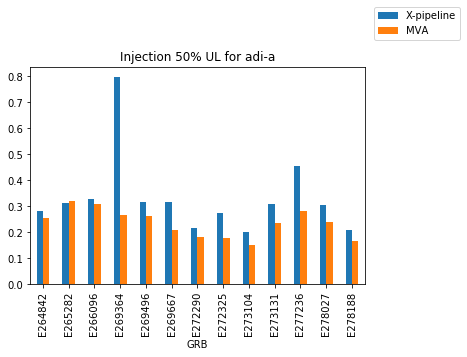

In [34]:
plot = plot_df.plot(kind='bar',title="Injection 50% UL for adi-a")
plot.legend(bbox_to_anchor=(1.3, 1.3))
fig = plot.get_figure()

#fig.savefig(fd+"/"+args.page_name[0]+".png",bbox_inches='tight')

In [35]:
plot_df = pd.concat([x_sgc, mva_sgc],axis=1)

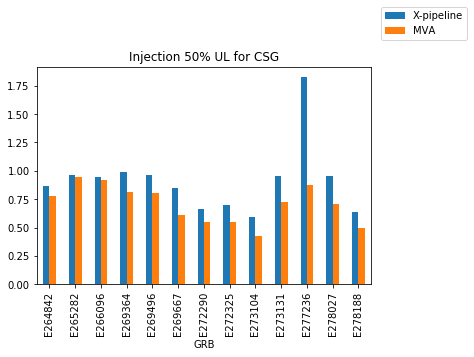

In [37]:
plot = plot_df.plot(kind='bar',title="Injection 50% UL for CSG")
plot.legend(bbox_to_anchor=(1.3, 1.3))
fig = plot.get_figure()

#fig.savefig(fd+"/"+args.page_name[0]+".png",bbox_inches='tight')

In [42]:
x_sgc.median(axis=0)

X-pipeline    0.945129
dtype: float64

In [43]:
mva_sgc.median(axis=0)

MVA    0.723649
dtype: float64

In [44]:
x_adi.median(axis=0)

X-pipeline    0.308376
dtype: float64

In [45]:
mva_adi.median(axis=0)

MVA    0.238171
dtype: float64